# Is Fandango Still Inflating Ratings?

In October 2015, [Walt Hickey](https://walthickey.com/) released an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) on [Fandango](https://www.fandango.com/)'s movie rating system that strongly suggested it to be biased and dishonest. In this project, I will be analying more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data
In order to determine whether a change has been made, I must compare the system's characteristics before and after Hickey's analysis. The data used by Hickey is available [here](https://github.com/fivethirtyeight/data/tree/master/fandango) on Github. Movie ratings data for movies released in 2016 and 2017 can also be found on Github, [here](https://github.com/mircealex/Movie_ratings_2016_17).

In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Allows displaying of plots
%matplotlib inline

# Read in the data
hickey_data = pd.read_csv('Datasets/fandango_score_comparison.csv')
new_data = pd.read_csv('Datasets/movie_ratings_16_17.csv')
# Explore data
hickey_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [2]:
new_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


To focus on Fandango's ratings, I'll separate the columns that relate only to Fandango.

In [3]:
hickey_fandango = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
new_fandango = ['movie', 'year', 'fandango']

hickey_data = hickey_data[hickey_fandango]
new_data = new_data[new_fandango]

hickey_data.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
new_data.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


As I am assessing Fandango's rating system following Hickey's analysis, the population of interest for this analysis comprises all of the movie ratings stored on Fandango's website, regardless of the year in which it was released. Each data set imported and loaded into this analysis is acting as a sample of the population at two different time periods - before and after Hickey's analysis. The samples represent the necessary time periods, however it must also be ensured that these samples are representative as well, otherwise large sampling errors are to be expected resulting in inaccurate conclusions.

From Hickey's article and the `README.md` file from the data set's repository, it can be seen that he used the following sampling criteria:
* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

The sampling conditions for the more recent data set are the following:
* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (it's unclear how many from the `README.md`)

This reveals that the neither sampling method used for the acquiring these data sets were random as some movies never had a chance of being included. As a result, it's questionable whether these samples are representative of the entire population that I am to be describing. It likely is not as it is clear that popularity is a key factor in a movie's inclusion as well as temporal trends having an influence on data (movies in 2015 may have been incredible or terrible relatvie to other years).

## Changing the Goal of Analysis
As a result of the lack of representative samples, new data could be collected to ensure samples are representative, however this is too time consuming a process to carry out for this project therefore I will shift the goal of the analysis. 

Instead of trying to determine whether there has been any change in Fandango's rating system following Hickey's analysis, the new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and 2016. This should also serve as a fairly good proxy for the initial goal.

## Isolating the Necessary Samples
With this new goal in mind, defining 'popular' is necessary. As Hickey's benchmark of 30 fan ratings was used, I will also use this as a benchmark of popularity.

In [5]:
hickey_data[hickey_data['Fandango_votes'] < 30]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


As expected, all movies in Hickey's data set can be classed as 'popular'. 

For the more recent data, there is no data to ascertain the number of ratings a movie received. One method to check for this is visiting the website and manually checking the number of reviews each movie received. However, to speed up the process, I will select a sample of 10 movies and manualy check their review count. 

In [6]:
# Sample 10 fixed values
new_data.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Upon reviewing the fan ratings, 90% of the movies in the sample can be classified as 'popular', enough to move forward with a bit more confidence.

To ensure this analysis follows the new goal of only assessing movies released in 2015 and 2016, removal of films released in any other year must be performed. It is already known that Hickey's data only contains movies released in 2015 so this does not need to be checked.

In [7]:
print(new_data['year'].unique())
new_data = new_data[new_data['year'] == 2016]
print(new_data['year'].unique())

[2016 2017]
[2016]


## Comparing Distribution Shapes for 2015 & 2016

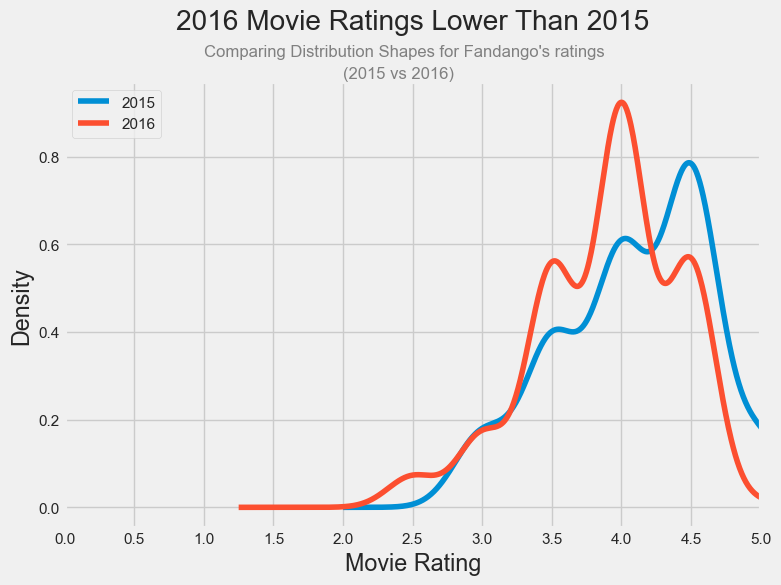

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 5.5))
hickey_data['Fandango_Stars'].plot.kde(label = '2015')
new_data['fandango'].plot.kde(label = '2016')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xlabel('Movie Rating')
plt.xlim([0,5])
plt.title('2016 Movie Ratings Lower Than 2015', y = 1.1)
plt.text(1, 1.03, "Comparing Distribution Shapes for Fandango's ratings", fontsize=12, color='gray')
plt.text(2, 0.98, '(2015 vs 2016)', fontsize=12, color='gray')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.show()

Assessing the distribution of movie ratings for both years shows that their distributions are negatively skewed, with most movies having a rating between 3.5 and 4.5. However, the movies from 2016 appear to follow more of a normal distribution, centred around a rating of 4. In comparison, the frequency of movies in 2015 only appears to increase as the movie rating increases (peaking at 4.5 rating), suggesting that only movies of a high quality were released this year, which is unlikely to be the case. The distribution of ratings for 2016 appears to be closer to what we may expect, with some movies released that year being great and others not so much. From this, we can see that Fandango's ratings for popular movies did decrease after Hickey's article was released. Whether the reason for this is due to Hickey's article or simply due to a reduction in movie quality that year cannot be confirmed from this graph.

## Comparing Relative Frequencies
While comparing the distributions of the movie ratings for 2015 and 2016 via kernel density plots is informative, further analysis at a more granular level can still be performed.

In [46]:
print(hickey_data['Fandango_Stars'].value_counts().sort_index(ascending = False))
print(new_data['fandango'].value_counts().sort_index(ascending = False))

5.0    11
4.5    55
4.0    41
3.5    27
3.0    12
Name: Fandango_Stars, dtype: int64
5.0     1
4.5    47
4.0    77
3.5    46
3.0    14
2.5     6
Name: fandango, dtype: int64


From observing the frequency distribution tables displayed, it is clear that the two data sets have a discrepancy in the number of movies they both have. As a result, absolute frequency values for each star rating is hard to compare. Therefore, comparison of their relative frequencies will be performed instead, showcasing the percentage of movies for each star rating for the respective years.

In [48]:
# Produce frequency distribution tables
print(hickey_data['Fandango_Stars'].value_counts(normalize = True).sort_index(ascending = False) * 100)
print(new_data['fandango'].value_counts(normalize = True).sort_index(ascending = False) * 100)

5.0     7.534247
4.5    37.671233
4.0    28.082192
3.5    18.493151
3.0     8.219178
Name: Fandango_Stars, dtype: float64
5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64


It is clear from the relative frequency values that there **is** a difference in the rating distribution between the two years. 2015 data shows 7.5% of movies were given a 5 star rating, which fell to only 0.5% in 2016, a sharp drop. We also see a 13% drop in movies given a 4.5 star rating, droppping from 37.6% to 24.6%. However, where we do see the increase is in movies given a 4 star rating, increasing by 12%. Furthermore, the number of movies given a 3.5 star rating increased by 6% as well as 2.5 star movies being found. This furthers the take that was suggested from the graph displayed previously.

## Determining the Direction of the Change

In [83]:
# Create dataframe storing statistics
mean_2015 = hickey_data['Fandango_Stars'].mean()
median_2015 = hickey_data['Fandango_Stars'].median()
mode_2015 = hickey_data['Fandango_Stars'].mode()

mean_2016 = new_data['fandango'].mean()
median_2016 = new_data['fandango'].median()
mode_2016 = new_data['fandango'].mode()

summary_statistics = pd.DataFrame(
                                {'averages': ['mean', 'median', 'mode'],
                                 '2015': [mean_2015, median_2015, mode_2015[0]],
                                 '2016': [mean_2016, median_2016, mode_2016[0]]})
summary_statistics.set_index('averages', inplace=True)
summary_statistics

,2015,2016
averages,,
mean,4.089041,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


From these statistics, it is clear that popular movies released in 2015 average higher movie ratings than popular movies released in 2016. However, the difference in the mean values is surprisingly not that much, as it is only a 0.2 rating difference - a 5% drop. This statistic could be used to suggest that there has not been a significant difference in the rating system between the two years. Furthermore, both have values have the same median, suggesting the central tendencies remain constant in the data.

<Figure size 800x550 with 0 Axes>

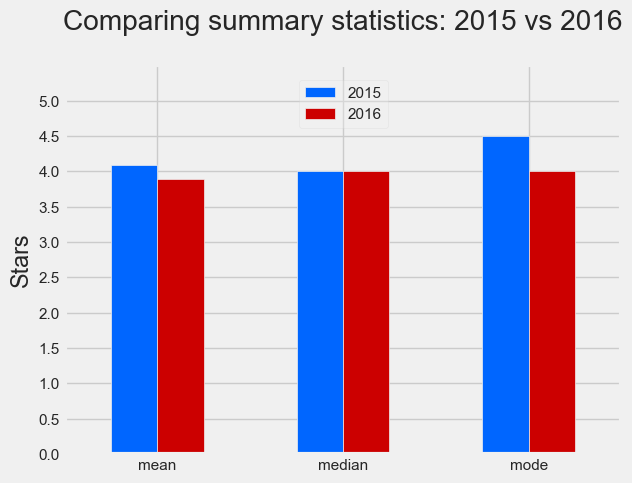

In [123]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 5.5))
summary_statistics.plot.bar(y = ['2015', '2016'], color = ['#0066FF', '#CC0000'])
plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.ylabel('Stars')
plt.ylim([0,5.5])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.xticks(rotation = 0)
plt.xlabel('')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.9), framealpha = 0.3)
plt.show()

## Conclusion
This analysis shows that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. It was also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

Determining the reason behind the change may require more strenuous analysis however Hickey's article is certainly likely to have contributed to the slight change in Fandango's rating system.